# All dimensionality reductions

## Imports and preprocessing

In [1]:
import pandas as pd

import Reader
import LogKeysManager
import ParamsExtractor
import DataPreprocessor
import ReduceDim
import ClusterData
import OneClass

2024-05-23 08:39:15.585359: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-23 08:39:15.585929: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-23 08:39:15.589260: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-23 08:39:15.644747: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-23 08:39:16.449418: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

In [2]:
# Testing Params Extractor
#log_types = ['cron', 'user']
log_types = ['cron', 'laurel', 'maillog', 'messages', 'secure', 'user']
file_paths = ['../../../temp_logs/login01.' + logtype + '.log' for logtype in log_types]

df_list = []

for file_path in file_paths:
    r = Reader.Reader(file_path)
    df = r.read_file()
    df_list.append(df)

In [3]:
df_after = []

for i, df in enumerate(df_list):
    p = ParamsExtractor.ParamsExtractor(df)
    df = p.convert_params(df)
    new_df = p.get_params()
    df_after.append(new_df)

for i in range(len(df_list)):
    #print('=================')
    #print(df_list[i].head())
    #print(df_list[i].columns)
    #print(df_list[i].iloc[0])
    #print('********')
    #print(df_after[i].head())
    #print(df_after[i].columns)
    #print(df_after[i].iloc[0])
    
    # Concatenate df and df_after
    df_list[i] = pd.concat([df_list[i], df_after[i]], axis=1)
    #print(df_list[i].columns)

In [4]:
# Data Preprcessor

for i, df in enumerate(df_list):
    d = DataPreprocessor.DataPreprocessor(df)
    enc = d.drop_and_one_hot_encode()
    df_list[i] = enc

## Dimensionality reduction

In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.decomposition import NMF

In [6]:
pcas = []
tsnes = []
umaps = []

for i in range(len(df_list)):
    print(log_types[i])
    r = ReduceDim.ReduceDim(3, df_list[i], [0, 0])
    pca_reduced_data = r.pca()
    tsne_reduced_data = r.tsne()
    umap_reduced_data = r.umap()
    pcas.append(pca_reduced_data)
    tsnes.append(tsne_reduced_data)
    umaps.append(umap_reduced_data)

cron
laurel
maillog
messages
secure
user


cron


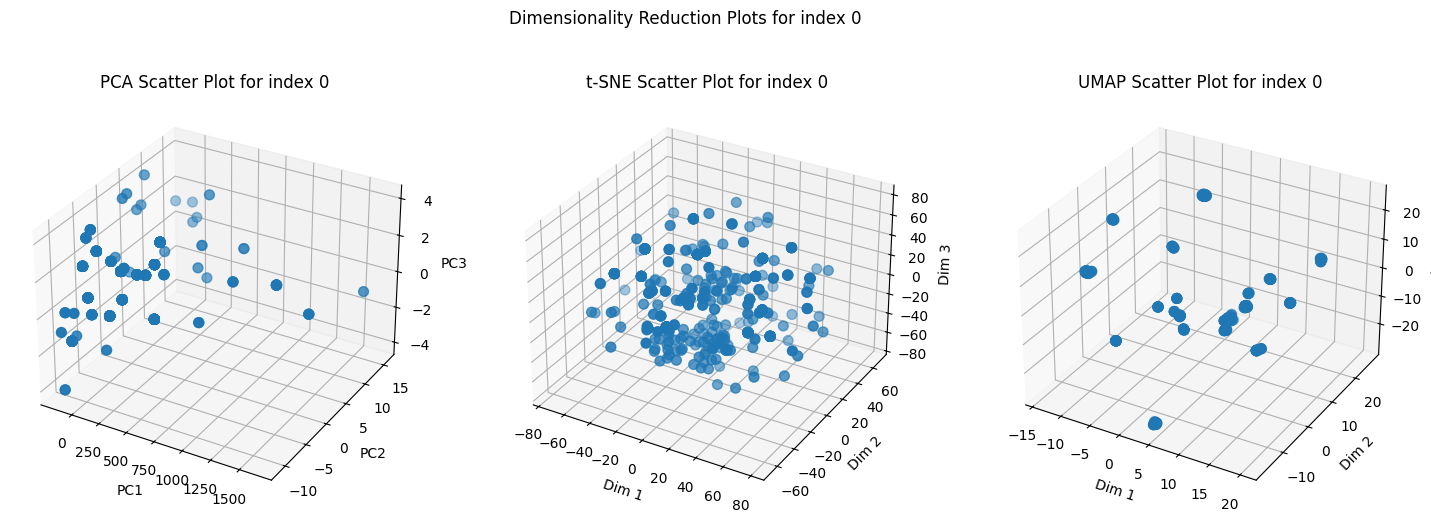

laurel


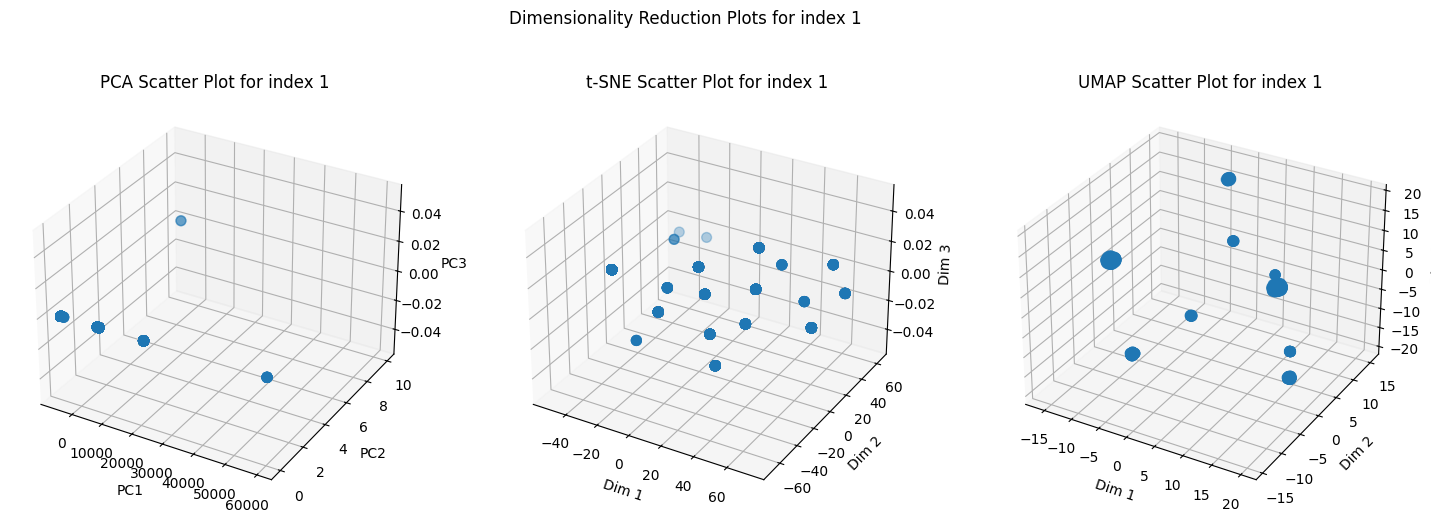

maillog


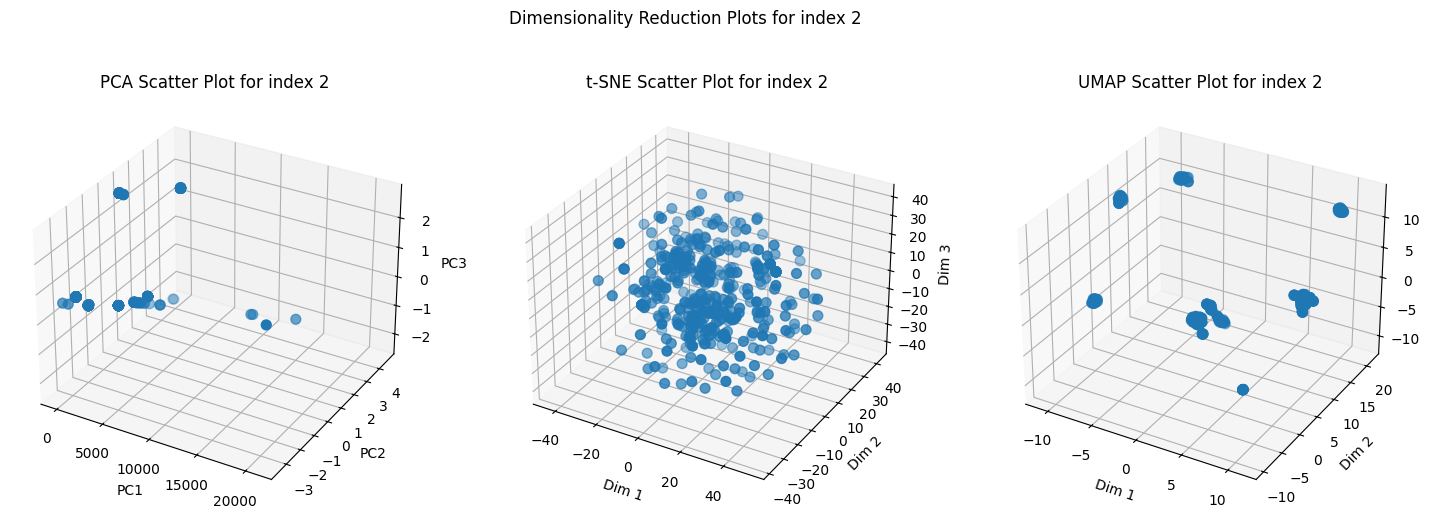

messages


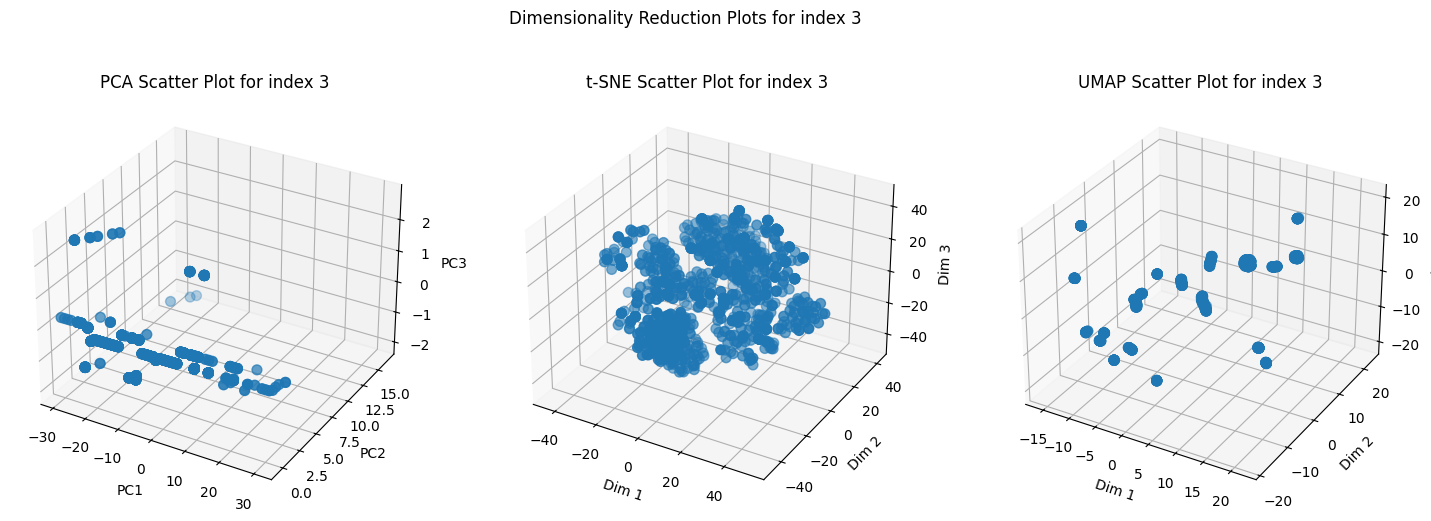

secure


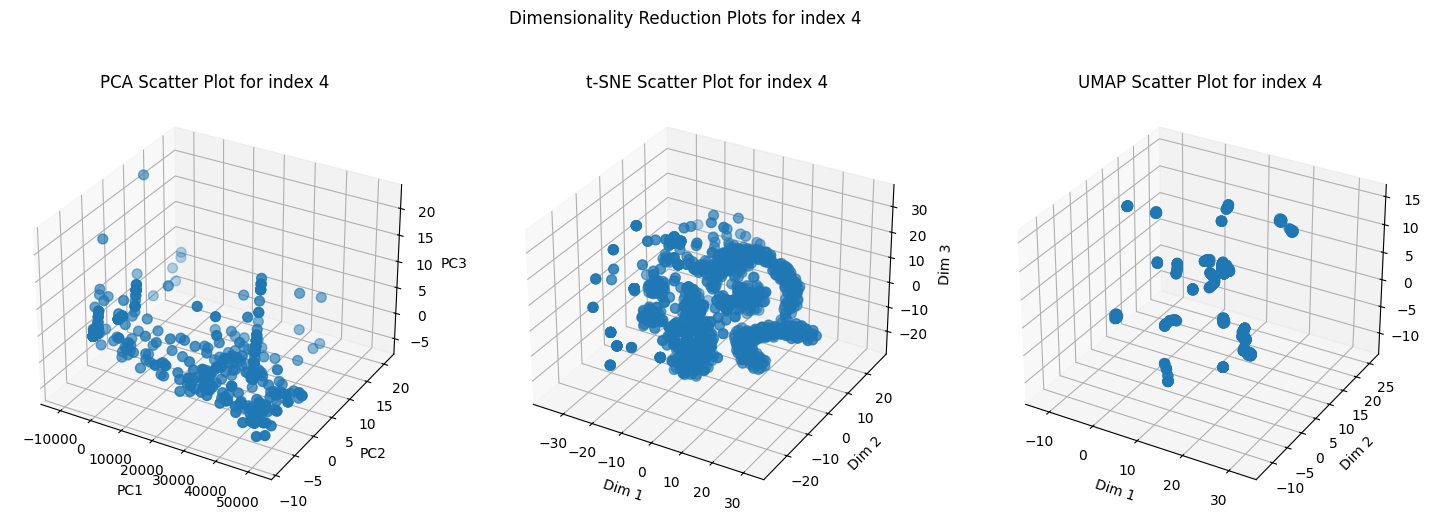

user


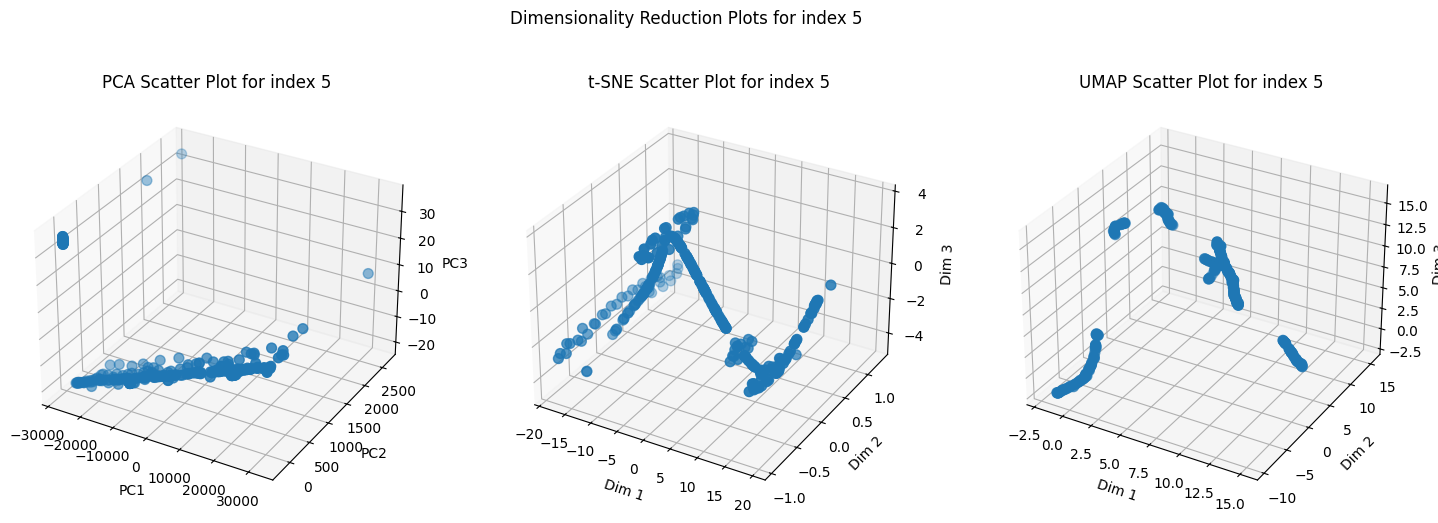

In [7]:
# Creating subplots for the first 6 indices
for i in range(len(df_list)):
    print(log_types[i])
    
    fig = plt.figure(figsize=(18, 6))

    # Plot PCA
    ax1 = fig.add_subplot(131, projection='3d')
    ax1.scatter(pcas[i][:, 0], pcas[i][:, 1], pcas[i][:, 2], s=50)
    ax1.set_xlabel('PC1')
    ax1.set_ylabel('PC2')
    ax1.set_zlabel('PC3')
    ax1.set_title(f'PCA Scatter Plot for index {i}')

    # Plot t-SNE
    ax2 = fig.add_subplot(132, projection='3d')
    ax2.scatter(tsnes[i][:, 0], tsnes[i][:, 1], tsnes[i][:, 2], s=50)
    ax2.set_xlabel('Dim 1')
    ax2.set_ylabel('Dim 2')
    ax2.set_zlabel('Dim 3')
    ax2.set_title(f't-SNE Scatter Plot for index {i}')

    # Plot UMAP
    ax3 = fig.add_subplot(133, projection='3d')
    ax3.scatter(umaps[i][:, 0], umaps[i][:, 1], umaps[i][:, 2], s=50)
    ax3.set_xlabel('Dim 1')
    ax3.set_ylabel('Dim 2')
    ax3.set_zlabel('Dim 3')
    ax3.set_title(f'UMAP Scatter Plot for index {i}')

    plt.suptitle(f'Dimensionality Reduction Plots for index {i}')
    plt.show()


### NMF

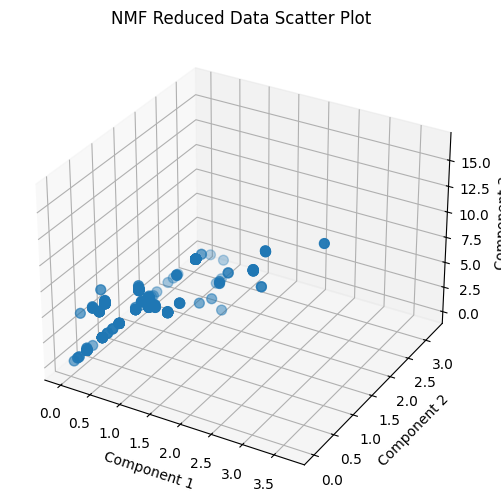

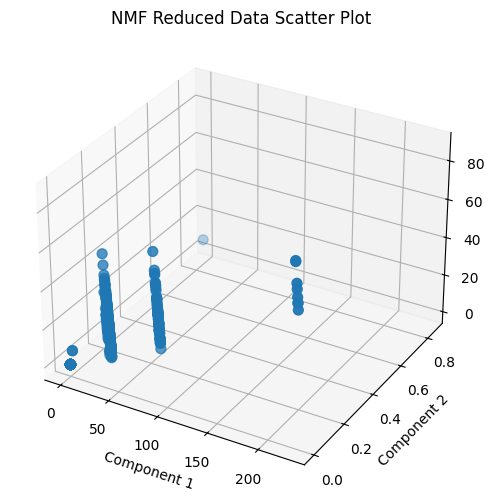

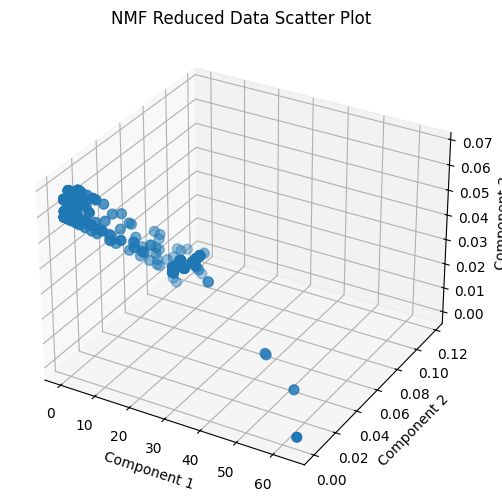

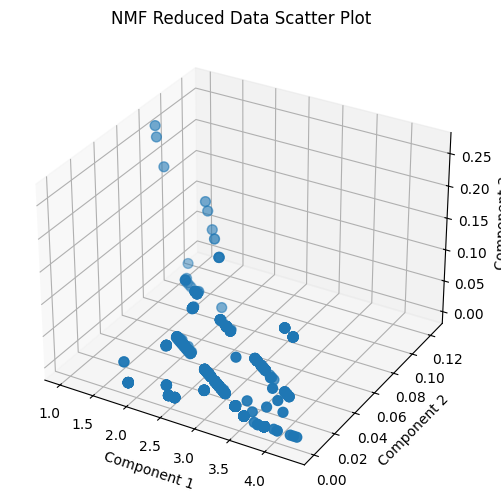

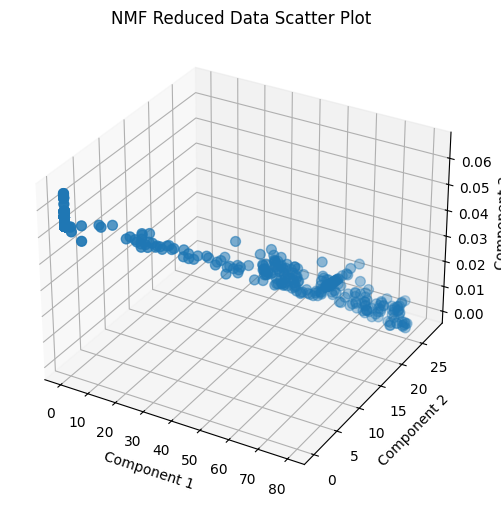

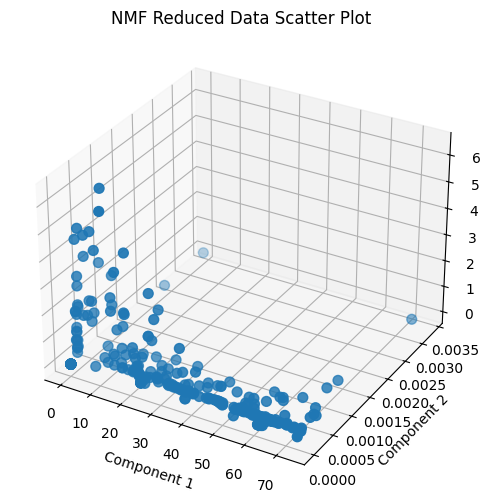

In [8]:
for data in df_list:
    data.replace(-1, 0, inplace=True)
    
    # Ensure data contains only non-negative values
    # If necessary, you can use a transformation to make all values non-negative
    # data = data - data.min().min()  # This is just an example
    
    # Perform NMF
    nmf = NMF(n_components=3, init='random', random_state=0)
    W = nmf.fit_transform(data)
    H = nmf.components_
    
    # Plotting the results in 3D
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    
    # Assuming W is the matrix with reduced dimensions
    ax.scatter(W[:, 0], W[:, 1], W[:, 2], s=50)
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.set_zlabel('Component 3')
    plt.title('NMF Reduced Data Scatter Plot')
    plt.show()


### Kernel PCA

In [9]:
from sklearn.decomposition import KernelPCA

NB. Linear kernel = standard PCA, poly kernel might try, rbf=gaussian try, other two try

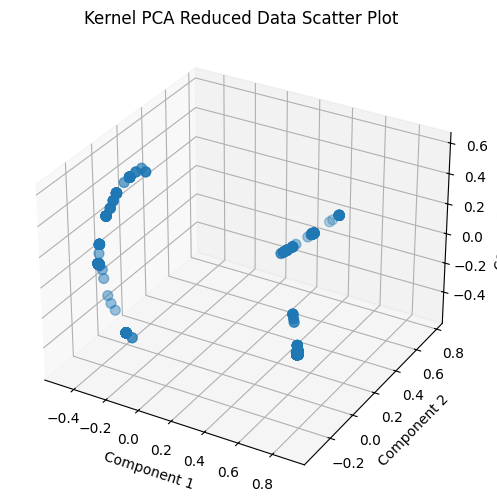

In [10]:
# Assuming data is a pandas DataFrame
data = df_list[0]

# Perform Kernel PCA
kpca = KernelPCA(n_components=3, kernel='rbf')  # 'linear', 'poly', 'rbf', 'sigmoid', or 'cosine'
X_kpca = kpca.fit_transform(data)

# Plotting the results in 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Assuming X_kpca is the matrix with reduced dimensions
ax.scatter(X_kpca[:, 0], X_kpca[:, 1], X_kpca[:, 2], s=50)
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.title('Kernel PCA Reduced Data Scatter Plot')
plt.show()


### Isomap

In [11]:
import warnings
warnings.filterwarnings("ignore")

In [12]:
from sklearn.manifold import Isomap

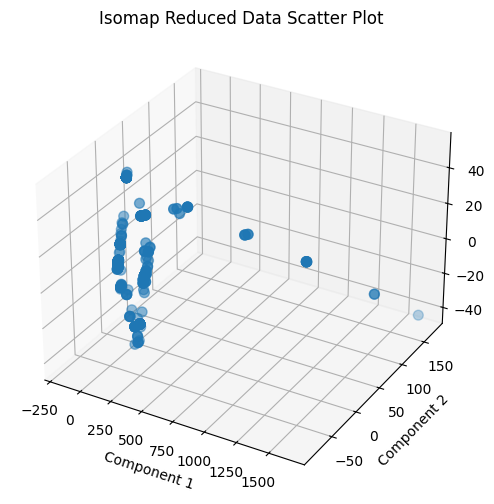

In [13]:
# Assuming data is a pandas DataFrame
data = df_list[0]

# Perform Isomap
n_neighbors = 5  # You can adjust the number of neighbors
isomap = Isomap(n_components=3, n_neighbors=n_neighbors)
X_isomap = isomap.fit_transform(data)

# Plotting the results in 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Assuming X_isomap is the matrix with reduced dimensions
ax.scatter(X_isomap[:, 0], X_isomap[:, 1], X_isomap[:, 2], s=50)
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.title('Isomap Reduced Data Scatter Plot')
plt.show()


### LLE

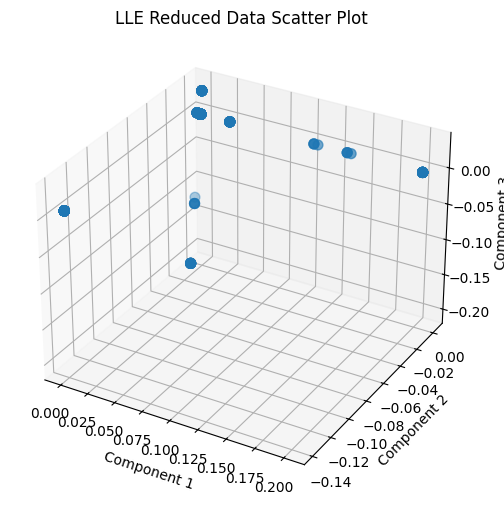

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import LocallyLinearEmbedding
from mpl_toolkits.mplot3d import Axes3D

# Assuming data is a pandas DataFrame
data = df_list[0]

# Perform LLE
n_neighbors = 10  # You can adjust the number of neighbors
lle = LocallyLinearEmbedding(n_components=3, n_neighbors=n_neighbors, method='standard')
X_lle = lle.fit_transform(data)

# Plotting the results in 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Assuming X_lle is the matrix with reduced dimensions
ax.scatter(X_lle[:, 0], X_lle[:, 1], X_lle[:, 2], s=50)
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.title('LLE Reduced Data Scatter Plot')
plt.show()


### MVU

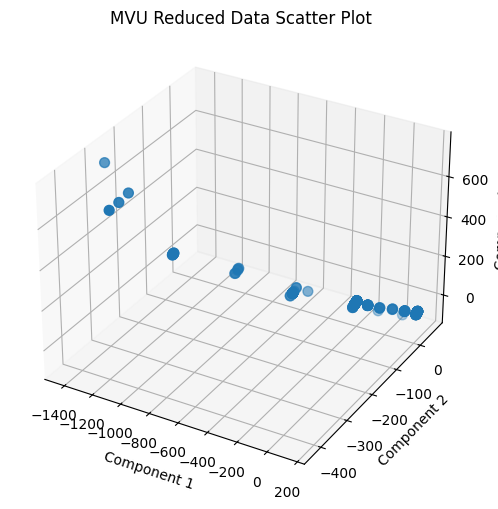

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from sklearn.manifold import MDS
from mpl_toolkits.mplot3d import Axes3D

# Assuming data is a pandas DataFrame
data = df_list[0]

# Compute pairwise distances
distances = pairwise_distances(data, metric='euclidean')

# Perform MDS with precomputed distances
mvu = MDS(n_components=3, dissimilarity='precomputed', random_state=0)
X_mvu = mvu.fit_transform(distances)

# Plotting the results in 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Assuming X_mvu is the matrix with reduced dimensions
ax.scatter(X_mvu[:, 0], X_mvu[:, 1], X_mvu[:, 2], s=50)
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.title('MVU Reduced Data Scatter Plot')
plt.show()


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from mpl_toolkits.mplot3d import Axes3D

# Assuming data is a pandas DataFrame
data = df_list[0]

# Extract features
X = data.values

# Perform LDA
lda = LinearDiscriminantAnalysis(n_components=3)
X_lda = lda.fit_transform(X)

# Perform GDA (QDA)
qda = QuadraticDiscriminantAnalysis(n_components=3)
X_qda = qda.fit_transform(X)

# Plotting the results in 3D for LDA
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(121, projection='3d')

ax.scatter(X_lda[:, 0], X_lda[:, 1], X_lda[:, 2], c='b', s=50)
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.set_title('LDA Reduced Data Scatter Plot')

# Plotting the results in 3D for GDA (QDA)
ax = fig.add_subplot(122, projection='3d')

ax.scatter(X_qda[:, 0], X_qda[:, 1], X_qda[:, 2], c='r', s=50)
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.set_title('GDA (QDA) Reduced Data Scatter Plot')

plt.tight_layout()
plt.show()


TypeError: fit() missing 1 required positional argument: 'y'

### Autoencoder

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

# Assuming data is a pandas DataFrame
data = df_list[0]

# Extract features
X = data.values

# Normalize the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Define the autoencoder architecture
input_dim = X.shape[1]
encoding_dim = 3  # Number of neurons in the hidden layer

# Input layer
input_layer = tf.keras.layers.Input(shape=(input_dim,))

# Encoder layers
encoder_layer1 = tf.keras.layers.Dense(encoding_dim, activation='relu')(input_layer)
encoder_layer2 = tf.keras.layers.Dense(encoding_dim // 2, activation='relu')(encoder_layer1)

# Decoder layers
decoder_layer1 = tf.keras.layers.Dense(encoding_dim // 2, activation='relu')(encoder_layer2)
decoder_layer2 = tf.keras.layers.Dense(input_dim, activation='sigmoid')(decoder_layer1)

# Combine encoder and decoder into an autoencoder model
autoencoder = tf.keras.models.Model(inputs=input_layer, outputs=decoder_layer2)

# Compile the model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
history = autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=32, shuffle=True, validation_split=0.2)

# Plot loss curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Autoencoder Training')
plt.legend()
plt.show()

# Use the trained autoencoder to perform dimensionality reduction
encoder = tf.keras.models.Model(inputs=input_layer, outputs=encoder_layer2)
X_encoded = encoder.predict(X_scaled)

# Plotting the results in 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Assuming X_encoded is the matrix with reduced dimensions
ax.scatter(X_encoded[:, 0], np.zeros_like(X_encoded[:, 0]), np.zeros_like(X_encoded[:, 0]), s=50)
ax.set_xlabel('Component 1')
ax.set_title('Autoencoder Reduced Data Scatter Plot')
plt.show()

## Testing ReduceDim

In [5]:
r = ReduceDim.ReduceDim(3, df_list[0], [1, 0])

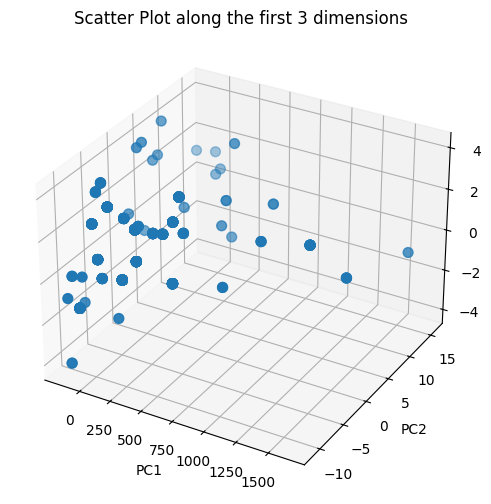

In [6]:
pca_reduced_data = r.pca()

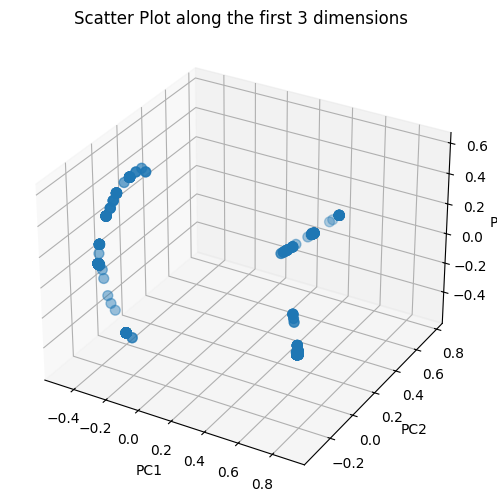

In [8]:
kern_reduced_data = r.kern_pca()

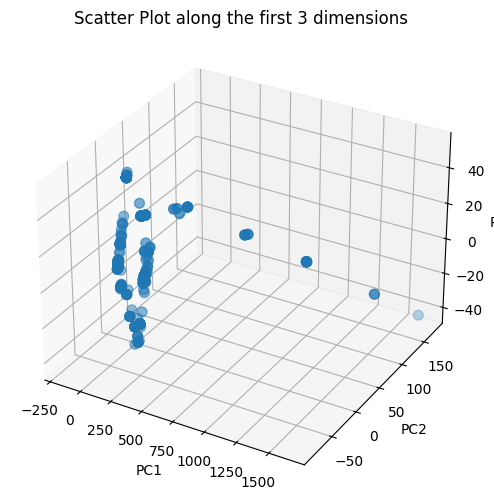

In [9]:
isomap_reduced_data = r.isomap()

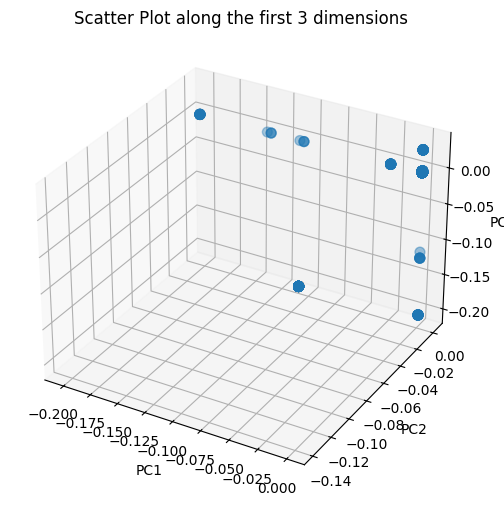

In [10]:
lle_reduced_data = r.lle()

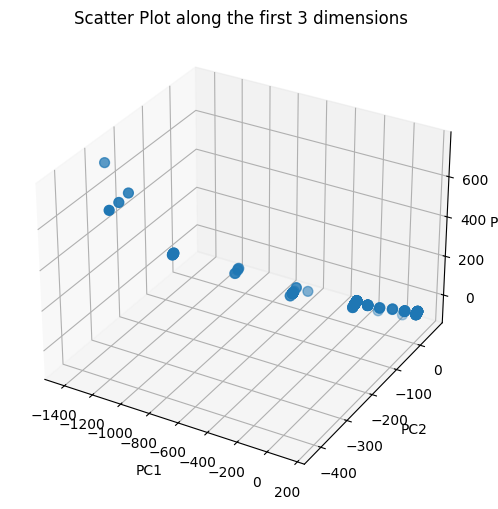

In [11]:
mvu_reduced_data = r.mvu()

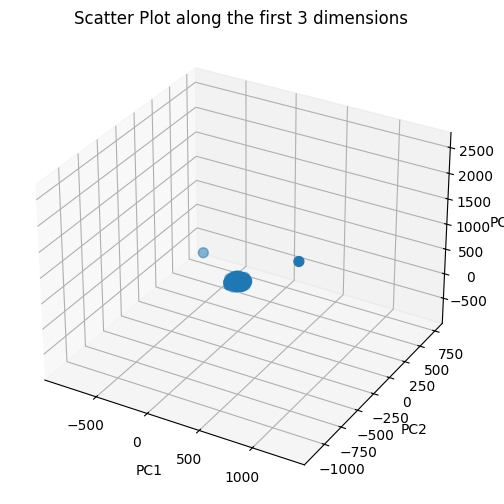

In [12]:
tsne_reduced_data = r.tsne()

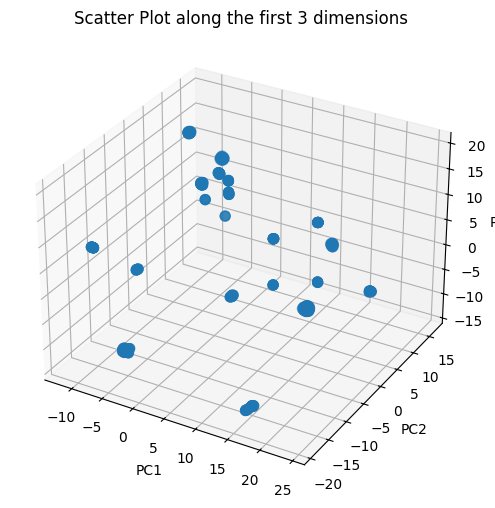

In [13]:
umap_reduced_data = r.umap()

Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.2483 - val_loss: 0.2456
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2445 - val_loss: 0.2412
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2398 - val_loss: 0.2353
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2332 - val_loss: 0.2267
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2237 - val_loss: 0.2150
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2111 - val_loss: 0.2001
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1950 - val_loss: 0.1821
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1762 - val_loss: 0.1614
Epoch 9/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1546 - val_loss: 0.1391
Epoch 10/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1315 - val_loss: 0.1163
Epoch 11/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1089 - val_loss: 0.0946
Epoch 12/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0879 - val_l

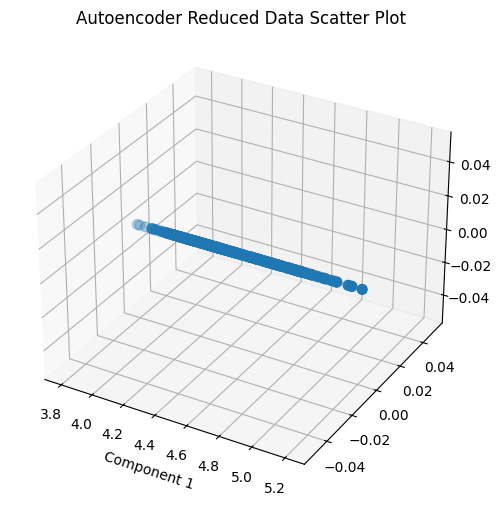

In [14]:
aut_reduced_data = r.autoencoder()